In [1]:
def update(expr):
    return expr.subs(dict(zip(expr.variables(), map(lambda v:eval(str(v)), expr.variables()))))

### Zadanie 1 

Korzystając z założeń Plancka wyprowadź wzór na średnią liczbę fotonów przypadajacych na jeden mod promieniowania ciała doskonale czarnego.

In [2]:
En = var('En', latex_name=r'E_n')
n = var('n')
h = var('h')
ni = var('ni', latex_name=r'\nu')
P = function('P')(En)
C = var('C')
k = var('k')
T = var('T')
ns = var('ns')

In [3]:
En = n*h*ni
show(En)

h*n*ni

In [4]:
P = C*e^(-En/(k*T))
show(P)

C*e^(-h*n*ni/(T*k))

In [5]:
ns = sum(n*P, n, 0, oo)
show(ns)

C*e^(h*ni/(T*k))/(e^(2*h*ni/(T*k)) - 2*e^(h*ni/(T*k)) + 1)

In [6]:
assume(e^((h*ni)/(T*k))-1>0)
prob_sum = sum(P, n, 0, oo)
show(prob_sum)

C*e^(h*ni/(T*k))/(e^(h*ni/(T*k)) - 1)

In [7]:
C_solve = solve(prob_sum==1, C)[0].rhs().expand()
show(C_solve)

-e^(-h*ni/(T*k)) + 1

In [8]:
result=ns.subs(C==C_solve).full_simplify()

In [9]:
show(result)

1/(e^(h*ni/(T*k)) - 1)

In [10]:
c = var('c')
u = function('u')(ni, T)

### Wniosek!
Gęstość energii promieniowania w wnęce modelujacej ciało doskonale czarne przyjmuje postać:

In [11]:
u = (8*pi*ni^2)/(c^3)*result*h*ni
show(u)

8*pi*h*ni^3/(c^3*(e^(h*ni/(T*k)) - 1))

### Zadanie 2
Wyraź rozkład widmowej gęstości $u(\nu,T)$ energii dla promieniowania ciała doskonale czarnego w funkcji  długości fali, tzn. znajdź nową funkcję $w(\lambda,T)$.

In [12]:
lbd = var('lbd', latex_name=r'\lambda')
w = function('w')(lbd, T)
x = var('x')
wx = function('w_x')(x, T)
ni = c/lbd

In [13]:
u = update(u)
show(u)

8*pi*h/(lbd^3*(e^(c*h/(T*k*lbd)) - 1))

In [14]:
de1 = u*diff(ni, lbd) + w == 0
de1 = update(de1)
show(de1)

-8*pi*c*h/(lbd^5*(e^(c*h/(T*k*lbd)) - 1)) + w(lbd, T) == 0

In [15]:
result_w = solve(de1, w)[0].rhs()
show(result_w)

8*pi*c*h/(lbd^5*e^(c*h/(T*k*lbd)) - lbd^5)

### Zadanie 3
Narysuj wykres otrzymanej zależności. Wymyśl przy tym własne jednostki dla wielkości fizycznych: długości fali, częstotliwości, temperatury, widmowej gęstości prawdopodobieństwa, itp.; tak by nie było koniecznym posługiwanie się niewygodnymi wartościami liczbowymi stałych fizycznych.

In [16]:
w=result_w
lbd0 = var('lbd0', latex_name = r'\lambda_0')
result_lbd0 = solve((c*h)/(k*T*lbd0)==1, lbd0)[0].rhs()
show(result_lbd0)
lbd0 = result_lbd0

c*h/(T*k)

In [17]:
show(w)

8*pi*c*h/(lbd^5*e^(c*h/(T*k*lbd)) - lbd^5)

In [18]:
de2 = wx - lbd0*w.subs(lbd==lbd0*x) == 0
show(de2)

-8*pi*c^2*h^2/((c^5*h^5*x^5*e^(1/x)/(T^5*k^5) - c^5*h^5*x^5/(T^5*k^5))*T*k) + w_x(x, T) == 0

In [19]:
result_wx = solve(de2, wx)[0].rhs()
show(result_wx)

8*pi*T^4*k^4/(c^3*h^3*x^5*e^(1/x) - c^3*h^3*x^5)

In [20]:
wx = result_wx
w0 = wx.subs(x==1)
show(w0)

8*pi*T^4*k^4/(c^3*h^3*e - c^3*h^3)

In [21]:
ws = function('w_s')(x)

In [22]:
ws = wx/w0
ws = ws.full_simplify()
show(ws)

(e - 1)/(x^5*e^(1/x) - x^5)

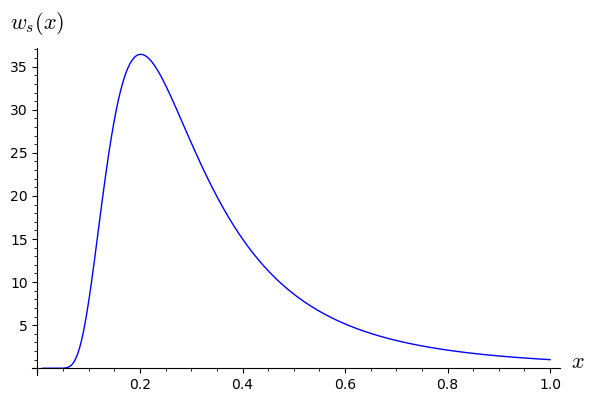

In [23]:
plot(ws, (x, 0.01, 1), axes_labels=['$x$','$w_s(x)$'])

### Zadanie 4
Z prawa Plancka wyprowadź prawo przesunięć Wiena $\lambda T=const$. Do rozwiazywania równań przestępnych zastosuj metodę graficzną i numeryczną.

Wskazówka: Zastosuj wynik skalownia widmowej gęstosci energii promieniowania (w funkcji dł. fali)  z zadania 3.

In [24]:
show(diff(ws, x).full_simplify())

(5*x*(e - 1) - (5*x*(e - 1) - e + 1)*e^(1/x))/(x^7*e^(2/x) - 2*x^7*e^(1/x) + x^7)

In [25]:
diff(ws, x).full_simplify()

(5*x*(e - 1) - (5*x*(e - 1) - e + 1)*e^(1/x))/(x^7*e^(2/x) - 2*x^7*e^(1/x) + x^7)

In [26]:
numerator = (5*x*(e - 1) - (5*x*(e - 1) - e + 1)*e^(1/x))
show(numerator.factor())

-(5*x*e^(1/x) - 5*x - e^(1/x))*(e - 1)

In [27]:
factor(numerator)

-(5*x*e^(1/x) - 5*x - e^(1/x))*(e - 1)

In [28]:
y1 = function('y1')(x)
y2 = function('y2')(x)

In [29]:
y1 = 5*x
y2 = - e^(1/x) + 5*x*e^(1/x)

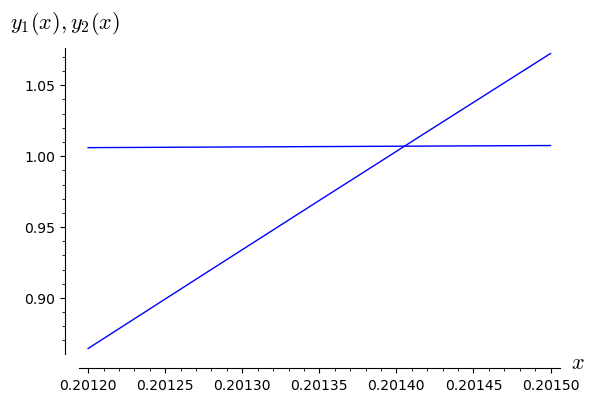

In [30]:
p1 = plot(y1, (x, 0.2012, 0.2015))
p2 = plot(y2, (x, 0.2012, 0.2015), axes_labels=['$x$','$y_1(x), y_2(x)$'])
show(p1+p2)

In [31]:
eq = -(5*x*e^(1/x) - 5*x - e^(1/x))
xmax = find_root(eq==0, 0.18, 0.22)
show(xmax)

0.20140523527264254

In [32]:
lbdmax = xmax*lbd0.subs(c==299792458, h==2 * N(pi) * 1.05457*10^(-34), k=1.38065*10^(-23))
show(lbdmax)

0.00289776486178089/T